In [2]:
import json
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions as Reactions
from pprint import pprint

In [3]:
with open('trees.json') as json_file:
    data = json.load(json_file)
    print(data)

[{'type': 'mol', 'hide': False, 'smiles': 'COc1cccc(OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)c1', 'is_chemical': True, 'in_stock': False, 'children': [{'type': 'reaction', 'hide': False, 'smiles': '[C:1](\\[cH3:2])=[C:3]/[CH:4]=[O:5]>>O=[C:1][cH3:2].[C:3][CH:4]=[O:5]', 'is_reaction': True, 'metadata': {'template_hash': '9d391d72bde667d0814b2004adf87b3673429821f807044c077deb9caedc6851', 'classification': '0.0 Unrecognized', 'library_occurence': 494, 'policy_probability': 0.002099999925121665, 'policy_probability_rank': 16, 'policy_name': 'uspto', 'template_code': 26192, 'template': '[O;D1;H0:5]=[C:4]/[CH;D2;+0:3]=[CH;D2;+0:1]/[c:2]>>O=[CH;D2;+0:1]-[c:2].[CH3;D1;+0:3]-[C:4]=[O;D1;H0:5]', 'mapped_reaction_smiles': '[CH3:1][O:2][c:3]1[cH:4][cH:5][cH:6][c:7]([O:8][C:9](=[O:10])/[CH:11]=[CH:12]/[c:13]2[cH:14][c:15]([O:16][CH3:17])[c:18]([O:19][CH3:20])[c:21]([O:22][CH3:23])[cH:24]2)[cH:25]1>>[CH3:1][O:2][c:3]1[cH:4][cH:5][cH:6][c:7]([O:8][C:9](=[O:10])[CH3:11])[cH:25]1.[CH:12]([c:13]1[cH:14][c:15]([O

In [4]:
for i in range(len(data)):
    for key, value in data[i].items():
        if key != 'children':
            print(f'{key}, {value}\n')
        else:
            print('children <start>\n')
            for child in data[0]['children']:
                for key, value in child.items():
                    print(f'{key}: {value}\n')
            print('children <end>\n')

type, mol

hide, False

smiles, COc1cccc(OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)c1

is_chemical, True

in_stock, False

children <start>

type: reaction

hide: False

smiles: [C:1](\[cH3:2])=[C:3]/[CH:4]=[O:5]>>O=[C:1][cH3:2].[C:3][CH:4]=[O:5]

is_reaction: True

metadata: {'template_hash': '9d391d72bde667d0814b2004adf87b3673429821f807044c077deb9caedc6851', 'classification': '0.0 Unrecognized', 'library_occurence': 494, 'policy_probability': 0.002099999925121665, 'policy_probability_rank': 16, 'policy_name': 'uspto', 'template_code': 26192, 'template': '[O;D1;H0:5]=[C:4]/[CH;D2;+0:3]=[CH;D2;+0:1]/[c:2]>>O=[CH;D2;+0:1]-[c:2].[CH3;D1;+0:3]-[C:4]=[O;D1;H0:5]', 'mapped_reaction_smiles': '[CH3:1][O:2][c:3]1[cH:4][cH:5][cH:6][c:7]([O:8][C:9](=[O:10])/[CH:11]=[CH:12]/[c:13]2[cH:14][c:15]([O:16][CH3:17])[c:18]([O:19][CH3:20])[c:21]([O:22][CH3:23])[cH:24]2)[cH:25]1>>[CH3:1][O:2][c:3]1[cH:4][cH:5][cH:6][c:7]([O:8][C:9](=[O:10])[CH3:11])[cH:25]1.[CH:12]([c:13]1[cH:14][c:15]([O:16][CH3:17])[c:18]([O:19][

In [9]:
all_results = []
for i in range(len(data[:])):
    info_applicable_to_chemists = {
        'smiles': '',
        'in_stock': '',
        'reaction_smiles': '',
        'score': '',
        'precursors': [],
        'number of pre-cursors in stock': ''
    }

    target_smiles = data[i]['smiles']
    info_applicable_to_chemists['smiles'] = target_smiles
    
    target_in_stock = data[i]['in_stock']
    info_applicable_to_chemists['in_stock'] = target_in_stock

    rxn_smiles = data[i]['children'][0]['smiles']
    info_applicable_to_chemists['reaction_smiles'] = rxn_smiles
    
    reaction_score = data[i]['scores']['state score']
    info_applicable_to_chemists['score'] = reaction_score
    
    precursors_in_stock = data[i]['scores']['number of pre-cursors in stock']
    info_applicable_to_chemists['number of pre-cursors in stock'] = precursors_in_stock

    precursor_info = data[i]['children'][0]['children']
    for info in precursor_info:
        info_applicable_to_chemists['precursors'].append(info['smiles'])

    if info_applicable_to_chemists not in all_results:
        all_results.append(info_applicable_to_chemists)

print(*all_results, sep='\n\n')

{'smiles': 'COc1cccc(OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)c1', 'in_stock': False, 'reaction_smiles': '[C:1](\\[cH3:2])=[C:3]/[CH:4]=[O:5]>>O=[C:1][cH3:2].[C:3][CH:4]=[O:5]', 'score': 0.9976287063411217, 'precursors': ['COc1cccc(OC(C)=O)c1', 'COc1cc(C=O)cc(OC)c1OC'], 'number of pre-cursors in stock': 2}

{'smiles': 'COc1cccc(OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)c1', 'in_stock': False, 'reaction_smiles': '[C:1](=[O:2])([CH:3]=[CH2:4])[O:5][cH3:6]>>Cl[C:1](=[O:2])[CH:3]=[CH2:4].[O:5][cH3:6]', 'score': 0.994039853898894, 'precursors': ['COc1cccc(O)c1', 'COc1cc(/C=C/C(=O)Cl)cc(OC)c1OC'], 'number of pre-cursors in stock': 3}

{'smiles': 'COc1cccc(OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)c1', 'in_stock': False, 'reaction_smiles': '[C:1][O:2][cH3:3]>>COS(=O)(=O)O[C:1].[O:2][cH3:3]', 'score': 0.994039853898894, 'precursors': ['COS(=O)(=O)OC', 'COc1cccc(OC(=O)/C=C/c2cc(OC)c(O)c(OC)c2)c1'], 'number of pre-cursors in stock': 3}

{'smiles': 'COc1cccc(OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)c1', 'in_stock': False, 'reaction_s

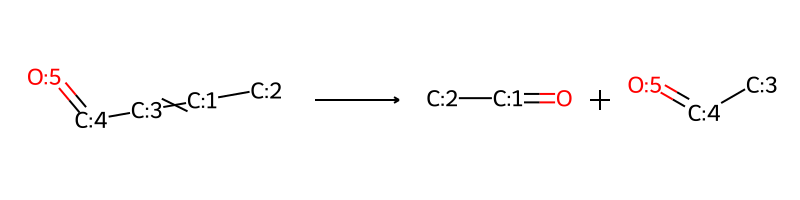

In [102]:
rxn = Reactions.ReactionFromSmarts('[C:1](\\[cH3:2])=[C:3]/[CH:4]=[O:5]>>O=[C:1][cH3:2].[C:3][CH:4]=[O:5]', useSmiles=True)
Draw.ReactionToImage(rxn)